In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [ ]:
#LD_wards=gpd.read_file("data/LD_boundary/London-wards-2018_ESRI/London_Ward_CityMerged.shp")
#london=LD_wards.unary_union
#london_gdf=gpd.GeoSeries(london)
#london_gdf.to_file('data/london_boundary.shp')

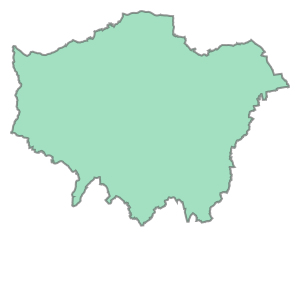

In [3]:
london_gdf=gpd.read_file('data/london_boundary.shp')
london=london_gdf.loc[0,'geometry']
london

In [ ]:
#GB_Gsp=gpd.read_file('data/OS Open Greenspace (ESRI Shape File) GB/data/GB_GreenspaceSite.shp')

#GB_Gsp['Is_Within_LD']=GB_Gsp['geometry'].within(london)

#Gsp=GB_Gsp[GB_Gsp['Is_Within_LD']].reset_index(drop=True)
#Gsp=Gsp.drop(['id','Is_Within_LD'],axis=1)
#Gsp.to_file('data/LD_GreenSpace.shp')

<AxesSubplot:>

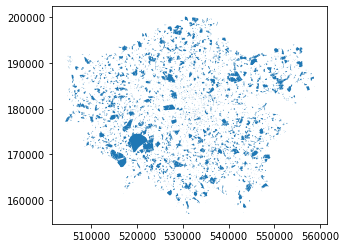

In [4]:
Gsp=gpd.read_file('data/LD_GreenSpace.shp')
Gsp.plot()

In [ ]:
'''
for typ in ['RoadLink','RoadNode','MotorwayJunction']:
    exec("%s=gpd.GeoDataFrame()"%typ)
    for tile in ['SP_','SU_','TL_','TQ_']:
        path="data/oproad_essh_gb/data/%s%s.shp"%(tile,typ)
        exec("%s%s=gpd.read_file(path)"%(tile,typ))
        exec("%s=%s.append(%s%s,ignore_index=True)"%(typ,typ,tile,typ))
'''

In [ ]:
'''
spatial_index=RoadLink.sindex
bbox=london.bounds
sidx = list(spatial_index.intersection(bbox))
RoadLink_sub=RoadLink.iloc[sidx]

RoadLink_clip = RoadLink_sub.copy()
RoadLink_clip['geometry'] = RoadLink_sub.intersection(london)
'''

In [ ]:
'''
RoadLink_clip=RoadLink_clip.reset_index(drop=True)
Rd=RoadLink_clip[RoadLink_clip['geometry'] != RoadLink_clip.loc[0,'geometry']].reset_index(drop=True)
Rd.head()
'''

In [ ]:
#Rd.to_file('data/london_Road.shp')

In [5]:
Rd=gpd.read_file('data/london_Road.shp')

In [10]:
Rd

,fictitious,identifier,class,roadNumber,name1,name1_lang,name2,name2_lang,formOfWay,length,primary,trunkRoad,loop,startNode,endNode,structure,nameTOID,numberTOID,function,geometry
0,false,8CC0934A-4A4A-435A-BEBB-521AD3E8C143,Not Classified,None,The Bridlepath,None,None,None,Single Carriageway,302,false,false,false,C19EB0EA-BED0-42A6-B4B0-EBDEFA73B800,EE0E8646-C1A3-4A78-94FF-6667EC2D5EAC,None,osgb5000005123758573,None,Restricted Local Access Road,"LINESTRING Z (531347.102 155899.478 0.000, 531..."
1,false,ECE86DA8-118A-46AB-8D5D-56F68B96E7BB,Unclassified,None,Ditches Lane,None,None,None,Single Carriageway,1599,false,false,false,5818762C-F0E5-4D3C-B28A-43D3BB81347C,A704D38C-5674-4270-A4C2-D936F9CE8429,None,osgb4000000030481053,None,Minor Road,MULTILINESTRING Z ((530900.469 155851.102 0.00...
2,false,960A1B1E-15CD-4E9C-816C-4F79CB0442E7,A Road,A233,Main Road,None,None,None,Single Carriageway,12,false,false,false,0B3C9057-F8D0-469F-BAAD-EF66693A6756,52F19A51-09CA-4BE2-932D-A6F5E0827706,None,osgb4000000030481070,osgb4000000030575917,A Road,"LINESTRING Z (543449.179 156812.005 0.000, 543..."
3,false,0E0182BB-7E46-4250-B9EE-37D58BA0E73C,Unclassified,None,Grays Road,None,None,None,Single Carriageway,16,false,false,false,52F19A51-09CA-4BE2-932D-A6F5E0827706,03D54909-5CE1-44C7-B9FE-E55812121CE9,None,osgb4000000030485658,None,Minor Road,"LINESTRING Z (543446.000 156819.000 0.000, 543..."
4,false,A6456BD8-2D7F-4CE9-9192-112965FA7AD1,Unclassified,None,Old Fox Close,None,None,None,Single Carriageway,230,false,false,false,FCE37925-FBDA-4361-A036-32922B6B3752,CDC3FDC8-BE9E-426C-8FAD-B2133897E040,None,osgb4000000030514396,None,Local Road,"LINESTRING Z (531860.000 156862.000 0.000, 531..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209196,false,BFE15866-E2A3-4312-A4E9-CEFC98F9D2B1,Motorway,M25,None,None,None,None,Collapsed Dual Carriageway,7724,true,true,false,E7C0C2CE-E1FE-4685-85C7-34FAC824B9F5,34203A75-488E-43E6-8263-837D47E0AD61,None,None,osgb4000000030880862,Motorway,"LINESTRING Z (534380.110 199983.730 0.000, 534..."
209197,false,613874C7-07E1-4964-8897-4864B2F4A6A5,Not Classified,None,None,None,None,None,Single Carriageway,307,false,false,false,2A8EEDC2-6F28-4737-AD28-EB82C74C9036,0C1D25A7-5121-4CE3-8451-BE2DA064227C,None,None,None,Restricted Local Access Road,"LINESTRING Z (530380.000 200341.000 0.000, 530..."
209198,false,3016694A-450D-4BC1-81D6-806729D0A446,Classified Unnumbered,None,Cattlegate Road,None,None,None,Single Carriageway,339,false,false,false,FD6DA8E2-DAF7-4767-8145-11C504E9C9A5,2A8EEDC2-6F28-4737-AD28-EB82C74C9036,None,osgb4000000028030972,None,Minor Road,"LINESTRING Z (530179.542 200587.355 0.000, 530..."
209199,false,74BC85AE-596A-4B38-9EB6-5A5EC77AEA6E,Unknown,None,None,None,None,None,Single Carriageway,564,false,false,false,8E9FD774-B892-4D4D-B5FF-57BFA418CDC1,A4086152-696D-48C1-9FC8-BB657402DF0F,None,None,None,Restricted Local Access Road,"LINESTRING Z (531530.360 200540.900 0.000, 531..."


In [12]:
AQMS_gdf=gpd.read_file('data/AQMS_loc.shp')
AQMS_gdf

,siteid,sitename,geometry
0,BX9,Bexley - Slade Green FDMS,POINT (551862.205 176375.976)
1,BL0,Camden - Bloomsbury,POINT (530120.048 182038.807)
2,CD9,Camden - Euston Road,POINT (529900.870 182666.124)
3,CD1,Camden - Swiss Cottage,POINT (526629.730 184391.024)
4,CT2,City of London - Farringdon Street,POINT (531622.273 181213.818)
5,CT3,City of London - Sir John Cass School,POINT (533480.243 181186.837)
6,CR8,Croydon - Norbury Manor,POINT (530322.972 169553.770)
7,GN0,Greenwich - A206 Burrage Grove,POINT (544084.015 178881.829)
8,GR4,Greenwich - Eltham,POINT (543978.694 174655.234)
9,GB0,Greenwich - Falconwood FDMS,POINT (544997.933 175098.152)


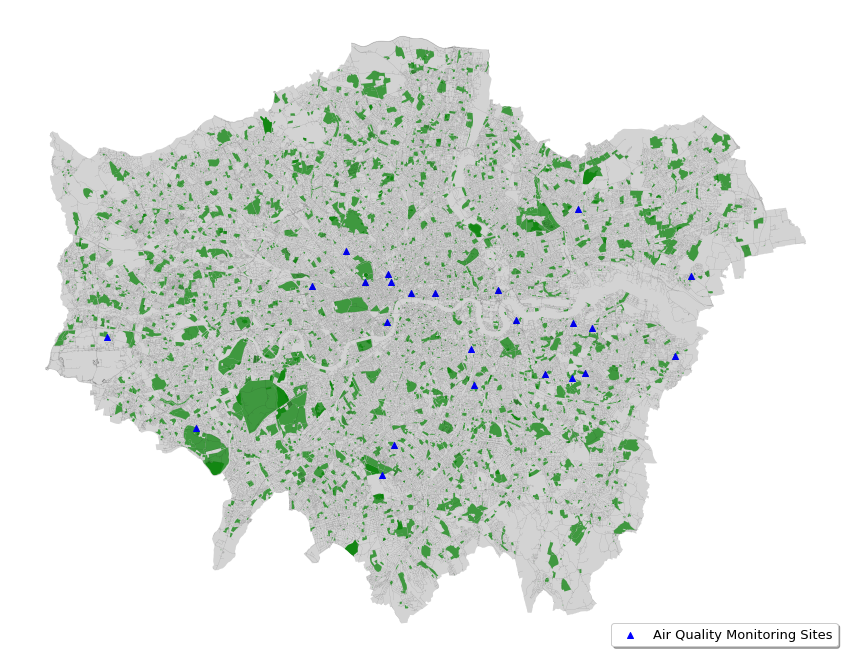

In [13]:
fig,ax=plt.subplots(1,figsize=(15,12))

london_gdf.plot(color='lightgrey',ax=ax)

Gsp.plot(color='green',alpha=0.7,ax=ax,linewidth=0)

Rd.plot(edgecolor='black',linewidth=0.05,ax=ax)

AQMS_gdf.plot(marker='^',color='blue',ax=ax,label='Air Quality Monitoring Sites')

ax.axis('off')
legend=ax.legend(loc='lower right',shadow=True,fontsize=13)

#plt.savefig('sample.png',dpi=400,facecolor='black')
plt.show()